# 1. Introduction

Name : Hilal Amirudin

Batch : RMT 019

Dataset : this dataset from https://www.kaggle.com/datasets/ifeanyinneji/nike-adidas-shoes-for-image-classification-dataset contain image shoes Adidas and Nike brand

Objectiv : Make a CNN model to classify Nike and Adidas for recommend shoe preferences customers

# 2. Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Folder Acses
import os
import glob

# Load data
import random
import numpy as np
import pandas as pd

# Visualization
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2S
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.layers import BatchNormalization


# Data Preprocessing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Input
from sklearn.metrics import confusion_matrix
from keras.optimizers import Adam

# Inference
from google.colab import files

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

# 3. Data Loading

In [ ]:
# Load image dataset

main_path= '/content/drive/MyDrive/Shoes_dataset/Brand'

# Checking Folder
os.listdir(main_path)

['validation', 'train', 'test']

In [ ]:
# Joinging path

train_dir = os.path.join(main_path, 'train')
test_dir = os.path.join(main_path, 'test')
val_dir = os.path.join(main_path, 'validation')

In [ ]:
# Checking Data with function

def check_dir(dir=None, labels=None):
  for label in labels:
    num_data= len(os.listdir(os.path.join(dir, label)))
    print(f'jumlah {label} : {num_data}')

print('train set: \n' + '='*50) 
check_dir(train_dir,['adidas','nike'])

print('\ntest set: \n' + '='*50) 
check_dir(test_dir,['adidas','nike'])

print('\nval set: \n' + '='*50) 
check_dir(val_dir,['adidas','nike'])

train set: 
jumlah adidas : 217
jumlah nike : 226

test set: 
jumlah adidas : 28
jumlah nike : 30

val set: 
jumlah adidas : 26
jumlah nike : 28


In [ ]:
# Get a list of image files with the .jpg extension in the 'adidas' and 'nike' folder within the train directory
train_adidas = glob.glob(train_dir + '/adidas/*.jpg')
train_nike = glob.glob(train_dir + '/nike/*.jpg')

# Get a list of image files with the .jpg extension in the 'adidas' and 'nike' folder within the test directory
test_adidas = glob.glob(test_dir + '/adidas/*.jpg')
test_nike = glob.glob(test_dir + '/nike/*.jpg')

# Get a list of image files with the .jpg extension in the 'adidas' and 'nike' folder within the validation directory
val_adidas = glob.glob(val_dir + '/adidas/*.jpg')
val_nike = glob.glob(val_dir + '/nike/*.jpg')

# 4. EDA

## Create Dataframe Image Shoes

In [ ]:
# Function to make dataframe

def create_dataframe(list_of_images):
    data = []
    for image in list_of_images:
        data.append((image, image.split('/')[-2]))
    return pd.DataFrame(data, columns=['images', 'label'])

In [ ]:
# Create a shuffled training dataframe
train_df = create_dataframe(train_adidas + train_nike)
train_df = train_df.sample(frac=1, random_state=1).reset_index(drop=True)

# Create a shuffled test dataframe
test_df = create_dataframe(test_adidas + test_nike)
test_df = test_df.sample(frac=1, random_state=1).reset_index(drop=True)

# Create a shuffled validation dataframe
val_df = create_dataframe(val_adidas + val_nike)
val_df = val_df.sample(frac=1, random_state=1).reset_index(drop=True)

In [ ]:
print(train_df.shape)
train_df.head()

(422, 2)


images   label
0  /content/drive/MyDrive/Shoes_dataset/Brand/tra...    nike
1  /content/drive/MyDrive/Shoes_dataset/Brand/tra...  adidas
2  /content/drive/MyDrive/Shoes_dataset/Brand/tra...  adidas
3  /content/drive/MyDrive/Shoes_dataset/Brand/tra...  adidas
4  /content/drive/MyDrive/Shoes_dataset/Brand/tra...  adidas

In [ ]:
print(test_df.shape)
test_df.head()

(57, 2)


images   label
0  /content/drive/MyDrive/Shoes_dataset/Brand/tes...    nike
1  /content/drive/MyDrive/Shoes_dataset/Brand/tes...  adidas
2  /content/drive/MyDrive/Shoes_dataset/Brand/tes...    nike
3  /content/drive/MyDrive/Shoes_dataset/Brand/tes...    nike
4  /content/drive/MyDrive/Shoes_dataset/Brand/tes...    nike

In [ ]:
print(val_df.shape)
val_df.head()

(53, 2)


images   label
0  /content/drive/MyDrive/Shoes_dataset/Brand/val...    nike
1  /content/drive/MyDrive/Shoes_dataset/Brand/val...  adidas
2  /content/drive/MyDrive/Shoes_dataset/Brand/val...    nike
3  /content/drive/MyDrive/Shoes_dataset/Brand/val...    nike
4  /content/drive/MyDrive/Shoes_dataset/Brand/val...    nike

## Data Distribution

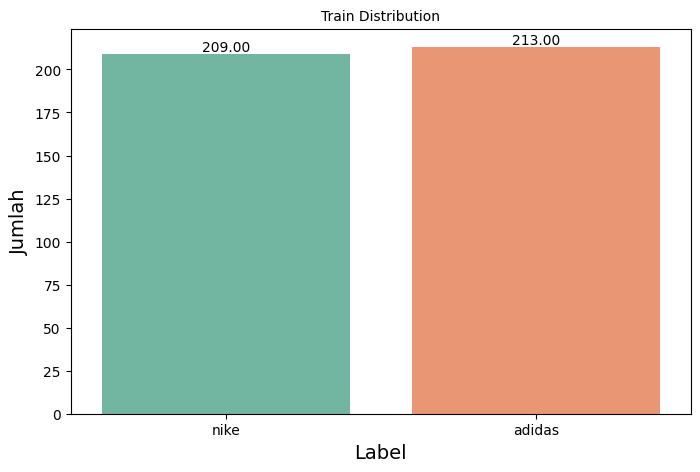

In [ ]:
# make count function for visualization

def visualize_data(dataframe, label):
    fig, ax = plt.subplots(figsize =(8, 5))
    ax = sns.countplot(x='label', data=dataframe, palette='Set2')
    ax.set_title('Data Distribution')
    ax.set_xlabel('Label')
    ax.set_ylabel('Count')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2,
                    p.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
    
    # Setting the label for x-axis
    plt.xlabel("Label", size=14)
    # Setting the label for y-axis
    plt.ylabel("Jumlah", size=14)
    # plt title base on name of 
    plt.title(f"{label} Distribution", size=10)
    plt.show()

# show visualization train data
visualize_data(train_df, 'Train')

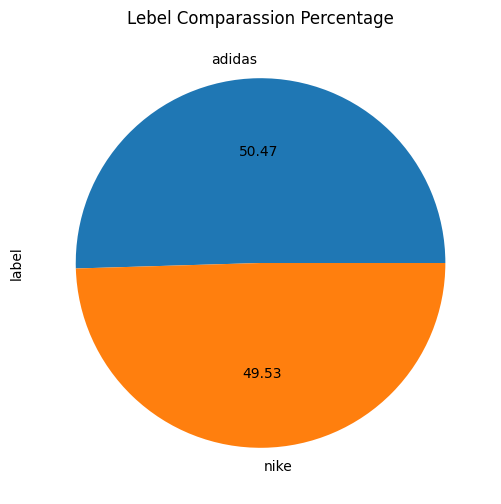

In [ ]:
# Visualization pie chart

train_df['label'].value_counts().plot(kind='pie', figsize=(6,6), autopct='%.2f')
plt.title('Lebel Comparassion Percentage')
plt.show()

In the dataset we used, the ratio of Adidas and Nike labels is nearly balanced.

## Size Image Shoes

In [ ]:
# Add image size information to train_df
train_df['Width'] = train_df['images'].apply(lambda x: cv2.imread(x).shape[1])
train_df['Height'] = train_df['images'].apply(lambda x: cv2.imread(x).shape[0])
train_df

images   label  Width  Height
0    /content/drive/MyDrive/Shoes_dataset/Brand/tra...    nike    224     224
1    /content/drive/MyDrive/Shoes_dataset/Brand/tra...  adidas    224     224
2    /content/drive/MyDrive/Shoes_dataset/Brand/tra...  adidas    224     224
3    /content/drive/MyDrive/Shoes_dataset/Brand/tra...  adidas    224     224
4    /content/drive/MyDrive/Shoes_dataset/Brand/tra...  adidas    224     224
..                                                 ...     ...    ...     ...
417  /content/drive/MyDrive/Shoes_dataset/Brand/tra...    nike    224     224
418  /content/drive/MyDrive/Shoes_dataset/Brand/tra...  adidas    224     224
419  /content/drive/MyDrive/Shoes_dataset/Brand/tra...    nike    224     224
420  /content/drive/MyDrive/Shoes_dataset/Brand/tra...    nike    224     224
421  /content/drive/MyDrive/Shoes_dataset/Brand/tra...  adidas    224     224

[422 rows x 4 columns]

Due to the uniform image sizes, the "Adidas" and "Nike" brand images in this dataset have the same visual perspective, implying visual consistency. This can be advantageous in reducing variation and complexity during brand recognition or image classification, as models only need to focus on subtle visual differences or specific features related to the designated brands.

## Sample Colour Visualization

After checking image size of shoes we have to check dominant shoe colors because dominant shoe colors can be significant visual features for distinguishing shoes with different characteristics. In CNN modeling, analyzing dominant colors can help the model recognize and learn color patterns associated with specific categories or attributes, such as red shoes, blue shoes, or brightly colored shoes. By analyzing dominant colors, the model can enhance its ability to recognize and understand shoes based on their visual features.

### RGB COLOUR

In [ ]:
# get sample image from dataset

adidas_samples = (train_df[train_df['label']=='adidas']['images'].iloc[:10]).tolist()
nike_samples = (train_df[train_df['label']=='nike']['images'].iloc[:10]).tolist()

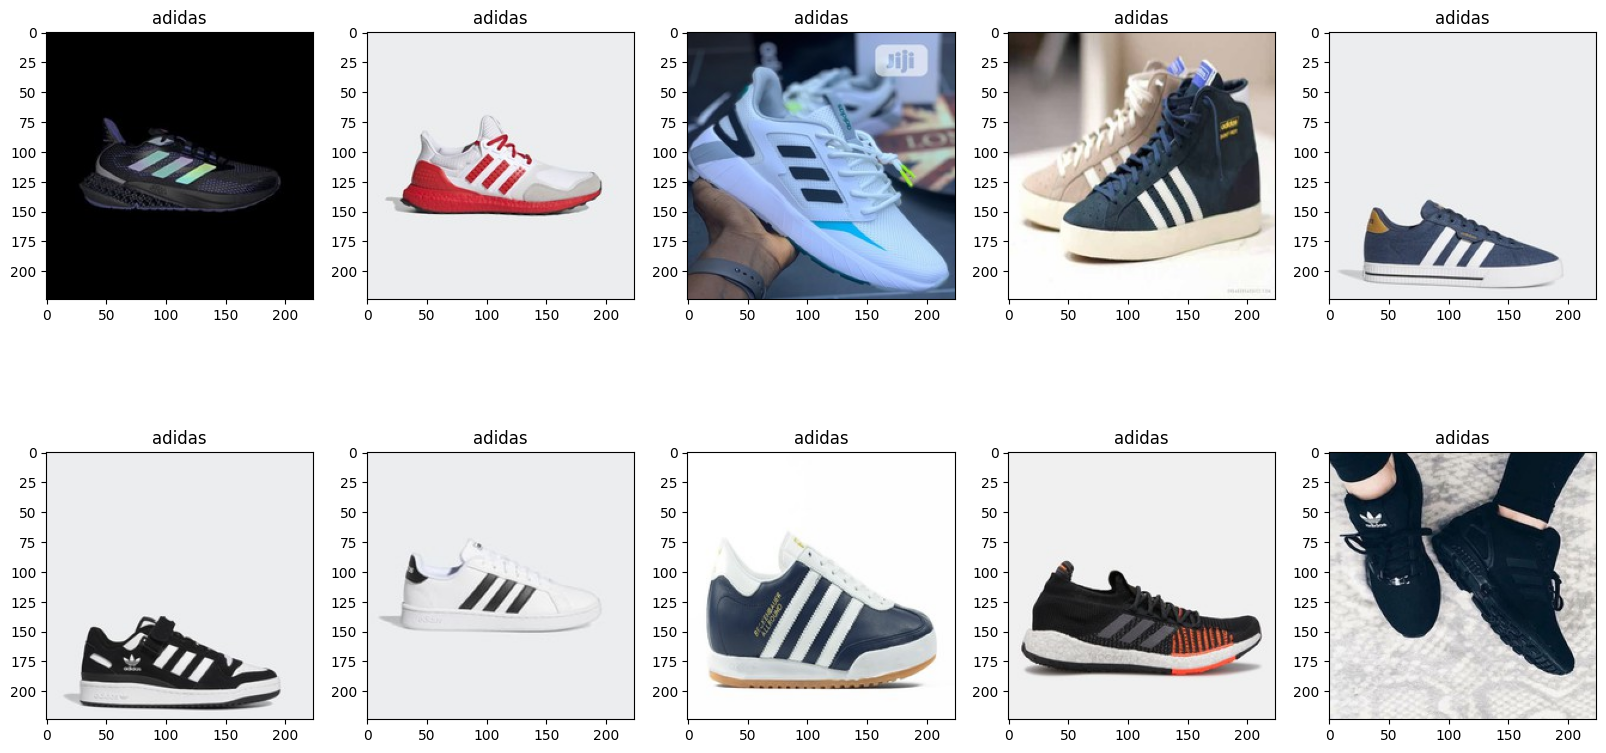

In [ ]:
# visualization  sample images adidas

def visualize_samples_adidas(samples):
    fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20,10))
    plt.title("Adidas Sample", fontsize = 12)
    for i, sample in enumerate(samples):
        img = cv2.imread(sample)
        ax[i//5, i%5].set_title(sample.split('/')[-2])
        ax[i//5, i%5].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

visualize_samples_adidas(adidas_samples)

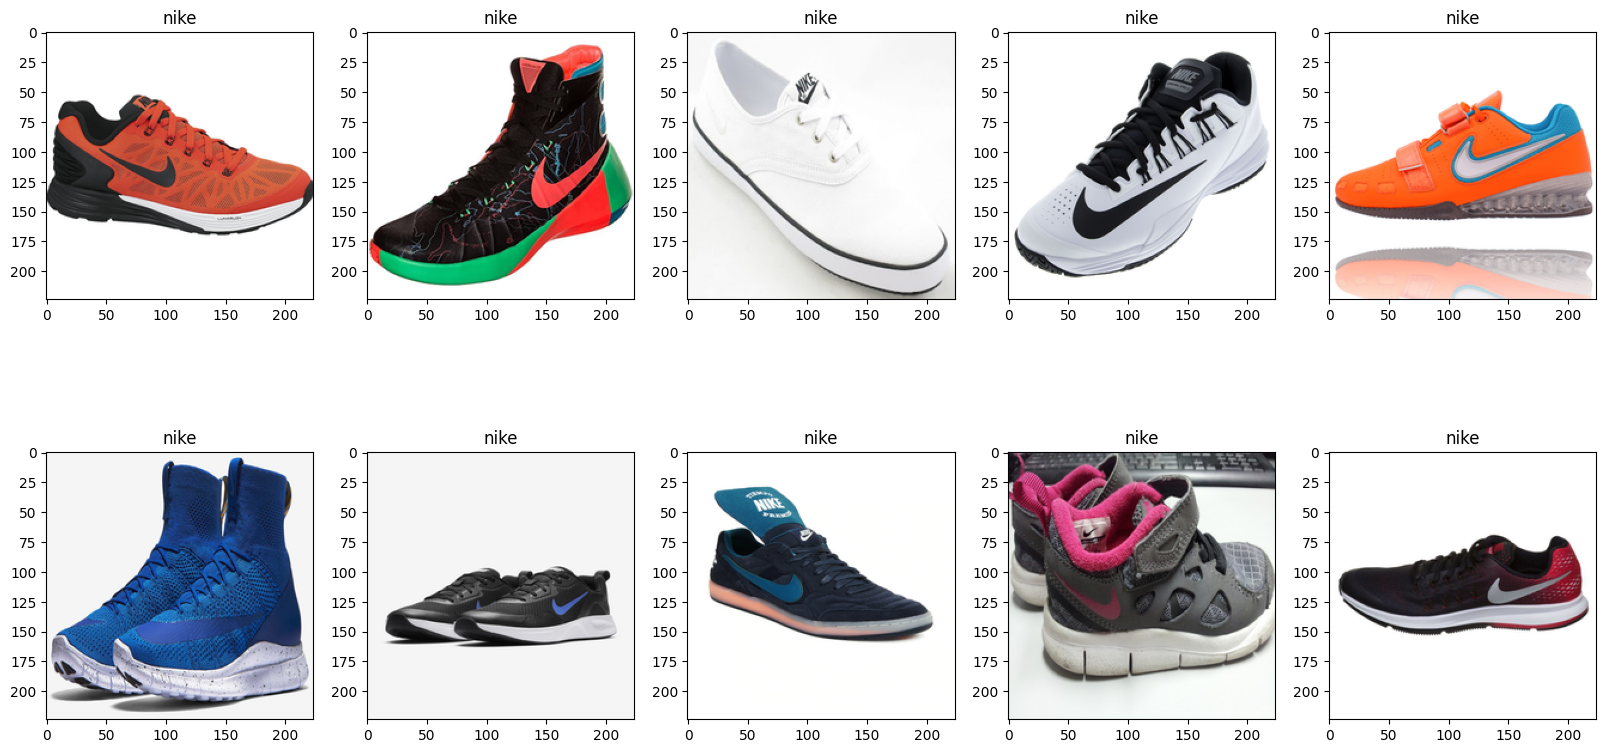

In [ ]:
# visualization  sample images nike

def visualize_samples_nike(samples):
    fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20,10))
    plt.title("Adidas Sample", fontsize = 12)
    for i, sample in enumerate(samples):
        img = cv2.imread(sample)
        ax[i//5, i%5].set_title(sample.split('/')[-2])
        ax[i//5, i%5].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

visualize_samples_nike(nike_samples)

After conducting a dominant color check using RGB on the sample data, the shoe images appear clear and visible.

### Hue, Saturation, Brightness

In [ ]:
# get sample image from dataset

adidas_sample = (train_df[train_df['label']=='adidas']['images'].iloc[:5]).tolist()
nike_sample = (train_df[train_df['label']=='nike']['images'].iloc[:5]).tolist()

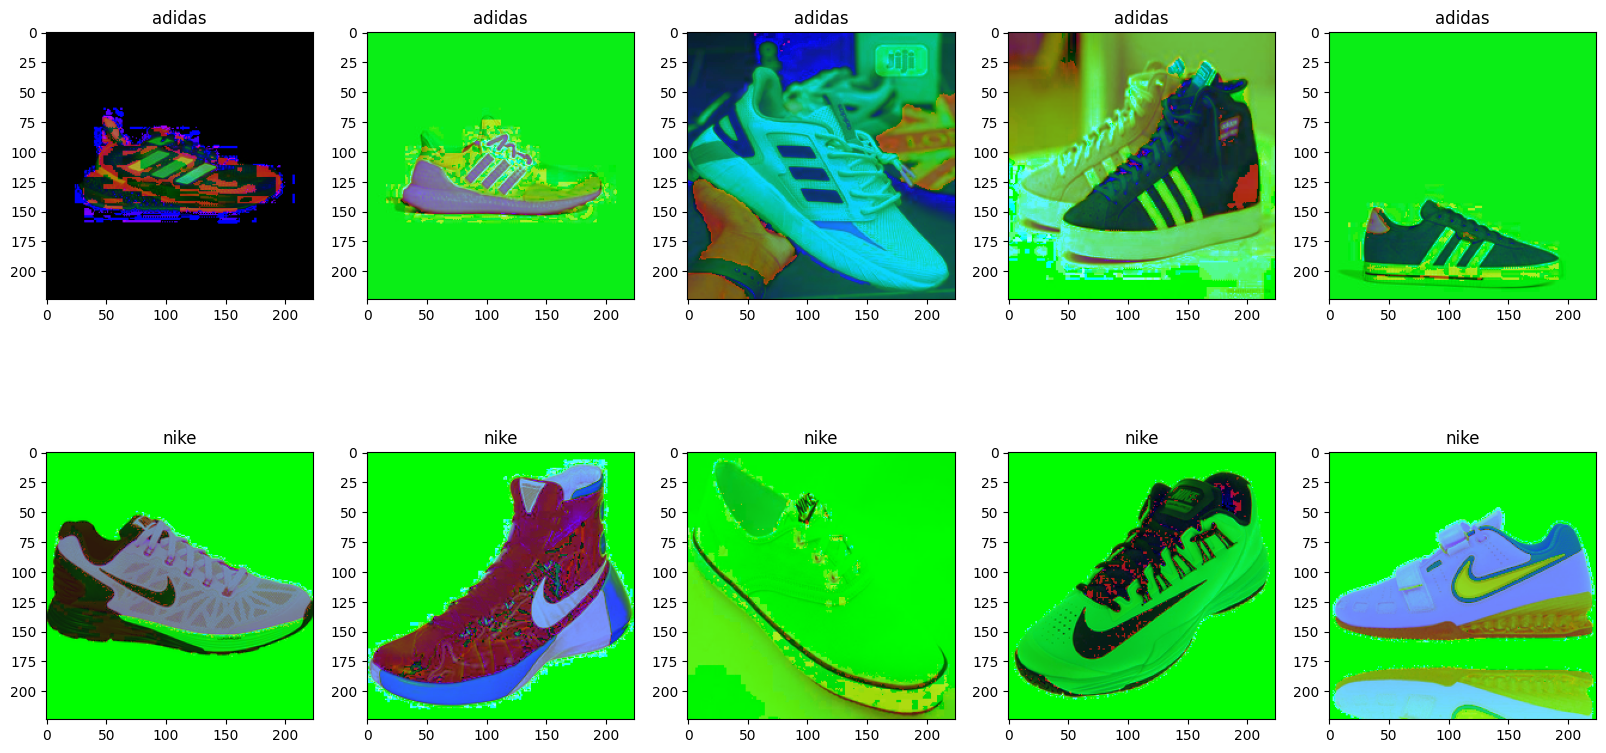

In [ ]:
# visualization sample images

def visualize_samples(samples):
    fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20,10))
    plt.title("Adidas Sample", fontsize = 12)
    for i, sample in enumerate(samples):
        img = cv2.imread(sample)
        ax[i//5, i%5].set_title(sample.split('/')[-2])
        ax[i//5, i%5].imshow(cv2.cvtColor(img, cv2.COLOR_RGB2HLS))
    plt.show()

visualize_samples(adidas_sample + nike_sample)

The HLS color space may not be the most suitable representation for capturing the visual details and complexity of the shoe images in terms of color. It could be due to the nature of the HLS color model, where the separation of hue, lightness, and saturation might not effectively capture the intricate color variations and textures present in the shoe designs.

### LUV Color Space

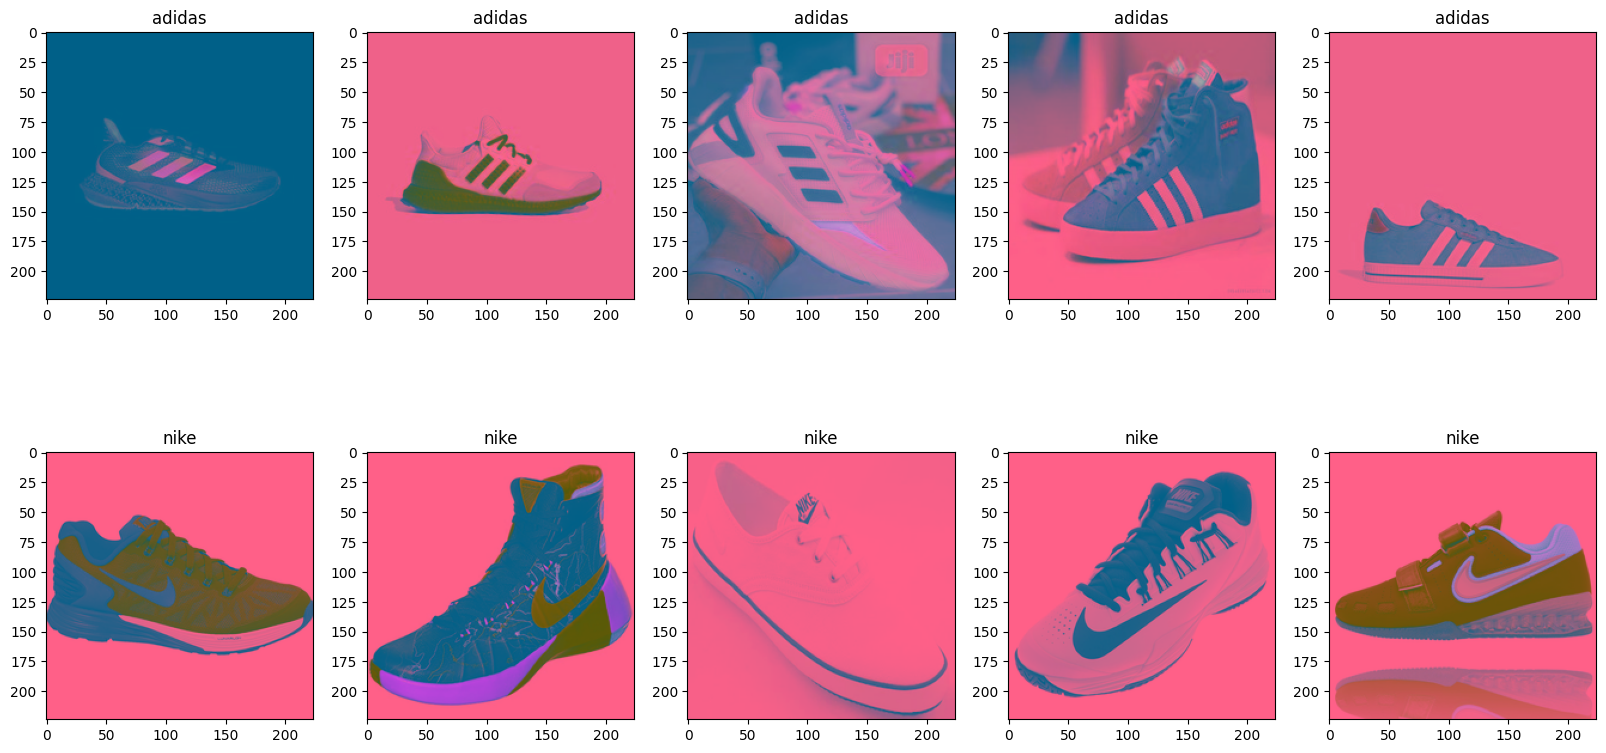

In [ ]:
# visualization sample images

def visualize_samples(samples):
    fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20,10))
    plt.title("Adidas Sample", fontsize = 12)
    for i, sample in enumerate(samples):
        img = cv2.imread(sample)
        ax[i//5, i%5].set_title(sample.split('/')[-2])
        ax[i//5, i%5].imshow(cv2.cvtColor(img, cv2.COLOR_RGB2LUV))
    plt.show()

visualize_samples(adidas_sample + nike_sample)

The LUV color space represents color based on human perception of lightness (L), chromaticity (U), and chromaticity (V). However, in some cases, using the LUV color space may not accurately capture the nuances and details of the colors in the shoe images. This can result in the images appearing less clear and with a dominant presence of a single color


---



It appears that after checking the dominant colors using RGB, HLS, and LUV color spaces, the clearest image is observed in the RGB color space. This suggests that the RGB color space provides the most accurate representation of the image's clarity or visual quality.

Color spaces such as RGB, HLS, and LUV represent colors differently, and each has its own advantages and use cases. In the case of image clarity, the RGB color space, which directly represents the intensity of red, green, and blue channels, might be more suitable for capturing and evaluating the visual quality of an image.

# 5. Feature Enginering

Augmentation serves the purpose of expanding and enhancing a training dataset by creating additional variations through transformations on existing data.

The main objectives and benefits of augmentation include:

1. Dataset expansion: In cases where the training sample size is limited, augmentation effectively "expands" the dataset by generating new variations from existing data. This provides the model with more examples to learn from, helping to prevent overfitting and improving generalization abilities in recognizing patterns.

2. Increased robustness to variations: Augmentation helps the model become more robust to variations in the test data. For example, by applying rotations, cropping, or translations to images, the model learns to recognize objects despite changes in position, viewpoint, or shifts in the data.

3. Overfitting prevention: By introducing additional variations in the dataset, augmentation helps prevent overfitting, which occurs when the model becomes too specialized or "memorizes" the training data and fails to generalize well to new data. By incorporating diversity in the training data, the model is expected to become more general in recognizing patterns and more adaptive to new data.



## Augmentasion

After checking the size in the EDA (Exploratory Data Analysis), it is found that the width and height of the images are 224 x 224 pixels. Therefore, we will use this data size for augmentation.

In [ ]:
# Set size image from EDA size image
img_height= 224
img_width= 224

# Set the specified seed for reproducibility
Seed = 1

# Set the batch size
batch_size= 64

We using an ImageDataGenerator is a convenient way to implement data augmentation in our image processing. The ImageDataGenerator class provides various methods and parameters to apply different augmentation techniques to our image data. The augmentations include:

1. Rotation: Randomly rotating the images by a certain angle.
2. Width and Height Shift: Randomly shifting the images horizontally or vertically by a specified fraction or pixel value.
3. Shear: Applying shear transformations to the images by randomly tilting them along the horizontal or vertical axis.
4. Zoom: Randomly zooming in or out on the images by a specified factor.
5. Horizontal and Vertical Flipping: Randomly flipping the images horizontally or vertically.
6. Brightness, Contrast, and Saturation Adjustment: Randomly adjusting the brightness, contrast, and saturation levels of the images.
7. Normalization: Rescaling the pixel values of the images to a specified range.

By configuring the augmentation techniques and parameters in the ImageDataGenerator, we can generate augmented images on the fly during model training.

In [ ]:
# create image generator
train_datagen = ImageDataGenerator(
    rescale=1./225, # Cause our pixel RGB type use 225 for pixel normalization
    rotation_range=0.1,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True) 

val_datagen = ImageDataGenerator(rescale=1./225)
test_datagen = ImageDataGenerator(rescale=1./225)

In [ ]:
# Create a training data generator using the train_df dataframe
ds_train = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='images', # Generate batches of augmented image data from the 'images' column as input
    y_col='label', # the 'label' column as the target
    target_size=(img_height, img_width), # Resize the images to the specified target size (img_height, img_width)
    class_mode='binary', # Use 'binary' class mode for binary classification
    batch_size=batch_size, 
    shuffle=True, # enable shuffling
    seed=Seed)

# Create a validation data generator using the val_df dataframe
ds_val = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='images', # Generate batches of augmented image data from the 'images' column as input
    y_col='label', # the 'label' column as the target
    target_size=(img_height, img_width), # Resize the images to the specified target size (img_height, img_width)
    class_mode='binary', # Use 'binary' class mode for binary classification
    batch_size=batch_size, 
    shuffle=False, # disable shuffling (to keep the order of data)
    seed=Seed) 

# Create a testing data generator using the test_df dataframe
df_test = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='images', # Generate batches of augmented image data from the 'images' column as input
    y_col='label', # the 'label' column as the target
    target_size=(img_height, img_width), # Resize the images to the specified target size (img_height, img_width)
    class_mode='binary', # Use 'binary' class mode for binary classification
    batch_size=batch_size,
    shuffle=False, # disable shuffling (to keep the order of data)
    seed=Seed)


Found 422 validated image filenames belonging to 2 classes.
Found 53 validated image filenames belonging to 2 classes.
Found 57 validated image filenames belonging to 2 classes.


1. Dataset Classes: The data consists of images belonging to 2 distinct classes. These classes could represent different categories, labels, or classes of objects that are being classified or predicted by the model.

2. Dataset Size: The number of validated image filenames gives us an idea of the size of each dataset. In this case, we have 422, 53, and 57 images in the respective datasets. Understanding the dataset size is important for assessing the adequacy of the data and determining the potential challenges of training a model with limited data.

3. Class Balance: It's essential to consider the distribution of classes in the dataset. If the number of images in each class is roughly balanced, it suggests that the dataset has equal representation of different classes, which can help in achieving better model performance. On the other hand, if there is a significant imbalance in the number of images between classes, it may lead to biased predictions and difficulty in learning the minority class.

In [ ]:
# show binary index for each brand

ds_train.class_indices

{'adidas': 0, 'nike': 1}

In [ ]:
# show binary index for each brand

df_test.class_indices

{'adidas': 0, 'nike': 1}

Adidas lebel is 0


---


Nike lebel is 1

# 6. Modeling

## Model Definition

We use clearing the session to reset or remove all variables, objects, and computations stored in the session memory

In [ ]:
# Clear Sesion

tf.keras.backend.clear_session()
np.random.seed(Seed)
tf.random.set_seed(Seed)

In [ ]:
callbacks1 = [
    EarlyStopping(monitor='val_loss', patience= 5),
    ModelCheckpoint('model_best.hdf5', monitor='val_loss', save_best_only=True)]

1. EarlyStopping: This callback is used to stop the training process early if there is no improvement in the monitored metric, which in this case is val_loss (validation loss). In the given syntax, patience=5 indicates that the training will be stopped after 5 epochs without any improvement in val_loss.

2. ModelCheckpoint: This callback is used to save the model with the best performance during training based on the monitored metric, which is val_loss. The model saved using this syntax is named 'model_best.hdf5', and only the model with the best val_loss will be saved.

3. Monitor validation loss because the goal of a machine learning model is to generalize well to unseen data. Validation loss serves as a proxy for model performance on new, unseen data. By monitoring validation loss, we can assess how well the model is generalizing and identify if it is overfitting (performing well on training data but poorly on validation or test data).

In [ ]:
# Dimension of image from EDA size image
width = 224
height = 224
channels = 3

# Model Definition
model_sequential = Sequential()

# Layer Conv 1
model_sequential.add(Conv2D(filters=64, kernel_size=3, activation='relu',
                            input_shape=(width, height, channels)))
model_sequential.add(MaxPooling2D(pool_size=2, strides=2))
model_sequential.add(Dropout(0.25))  # Added Dropout layer

# Layer Conv 2
model_sequential.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model_sequential.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten
model_sequential.add(Flatten())

# Hidden Layer
model_sequential.add(Dense(units=16, activation='relu'))
model_sequential.add(Dropout(0.25))  # Added Dropout layer

# Output Layer
model_sequential.add(Dense(units=1, activation='sigmoid'))

# Compile
model_sequential.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 111, 111, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 96800)             0

1. We add the first convolutional layer (Conv2D) to the model in cell 3. It has 64 filters, a kernel size of 3x3, and uses the ReLU activation function. The input_shape parameter specifies the shape of the input images. Next, a max pooling layer (MaxPooling2D) with a pool size of 2x2 and stride of 2 is added to downsample the feature maps. Finally, a dropout layer (Dropout) with a rate of 0.25 is added to randomly disable 25% of the neurons during training, which helps prevent overfitting.

2. We used flatten layer to the model, which flattens the 2D feature maps into a 1D vector. This is necessary to connect the convolutional layers to the fully connected layers.

3. Because our model about classification we use binary cross-entropy. t measures the dissimilarity between the predicted probability distribution and the true binary labels. It is well-suited for models that aim to output a probability for each class independently, such as in binary classification. By minimizing the binary cross-entropy loss, the model learns to assign higher probabilities to the correct class and lower probabilities to the incorrect class.

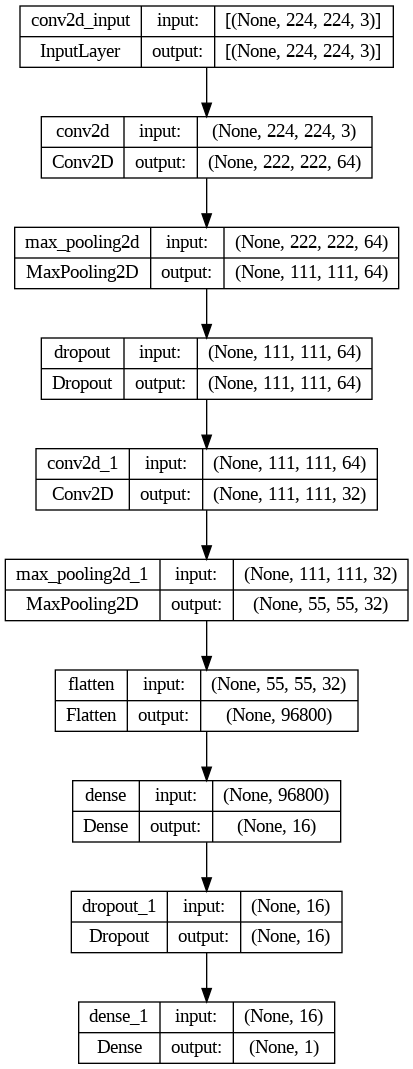

In [ ]:
# Plot Layer

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

## Model Training

In [ ]:
%%time
history_seq = model_sequential.fit(ds_train, batch_size= batch_size, 
                           epochs= 80, validation_data= ds_val,
                           callbacks= callbacks1)

Epoch 1/80
7/7 [==============================] - 9s 1s/step - loss: 1.3398 - accuracy: 0.4834 - val_loss: 0.6930 - val_accuracy: 0.5094
Epoch 2/80
7/7 [==============================] - 6s 895ms/step - loss: 0.6966 - accuracy: 0.5142 - val_loss: 0.6929 - val_accuracy: 0.5094
Epoch 3/80
7/7 [==============================] - 8s 1s/step - loss: 0.6929 - accuracy: 0.5142 - val_loss: 0.6931 - val_accuracy: 0.4906
Epoch 4/80
7/7 [==============================] - 7s 926ms/step - loss: 0.6928 - accuracy: 0.5071 - val_loss: 0.6928 - val_accuracy: 0.4717
Epoch 5/80
7/7 [==============================] - 8s 1s/step - loss: 0.6913 - accuracy: 0.5118 - val_loss: 0.6921 - val_accuracy: 0.4528
Epoch 6/80
7/7 [==============================] - 7s 923ms/step - loss: 0.6903 - accuracy: 0.4834 - val_loss: 0.6905 - val_accuracy: 0.4717
Epoch 7/80
7/7 [==============================] - 8s 1s/step - loss: 0.6880 - accuracy: 0.5118 - val_loss: 0.6853 - val_accuracy: 0.5283
Epoch 8/80
7/7 [================

## Model Evaluation

In [ ]:
# Make result of training model to data frame

history_seq_df = pd.DataFrame(history_seq.history)

<Axes: >

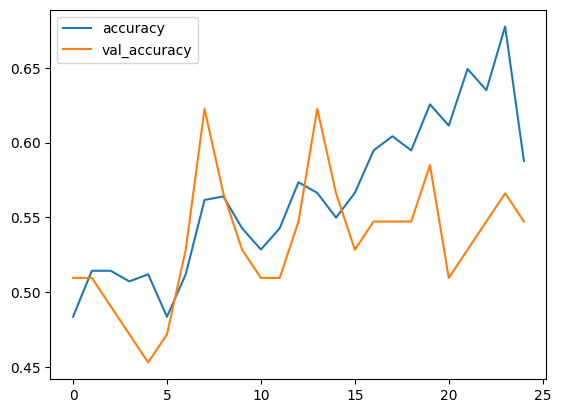

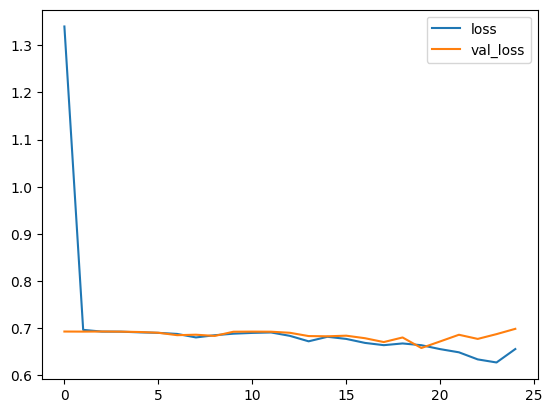

In [ ]:
# Show in Plot grafik about the result

history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()

The increasing validation loss after epoch 7 suggests that the model might be overfitting the training data. Overfitting occurs when the model performs well on the training data but fails to generalize to new, unseen data. The increasing validation loss indicates that the model's performance on unseen data is worsening as the training progresses.

In [ ]:
# Get Lebel from data train
y_true = df_test.labels

# Save model prediction for each batch
y_pred_seq = []
for _ in range(len(df_test)):
    batch_data, batch_labels = next(df_test)
    batch_predictions = model_sequential.predict(batch_data)
    batch_predictions = np.where(batch_predictions >= 0.5, 1, 0)
    y_pred_seq.extend(batch_predictions)

# Changes into array
y_true = y_true[:len(y_pred_seq)]
y_true = np.array(y_true)
y_pred_seq = np.array(y_pred_seq)

# Show classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_seq))

2/2 [==============================] - 0s 16ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.56      0.63        27
           1       0.67      0.80      0.73        30

    accuracy                           0.68        57
   macro avg       0.69      0.68      0.68        57
weighted avg       0.69      0.68      0.68        57



The classification report provides a detailed evaluation of the model's performance on the test data:

1. Precision: For class 0 (adidas), the precision is 0.71, which means that out of all the samples predicted as class 0, 71% of them are actually class 0. For class 1 (nike), the precision is 0.67, indicating that 67% of the samples predicted as class 1 are truly class 1.
2. Recall: The recall for class 0 is 0.56, which means that the model correctly identifies 56% of the actual class 0 samples. The recall for class 1 is 0.80, indicating that the model captures 80% of the true class 1 samples.
3. F1-score: The F1-score for class 0 is 0.63, which is a harmonic mean of precision and recall and provides a balanced measure of the model's performance for class 0. The F1-score for class 1 is 0.73, indicating the overall performance for class 1.
4. Accuracy: The overall accuracy of the model is 0.68, which means that it correctly classifies 68% of the test samples.

Confusion Matrix


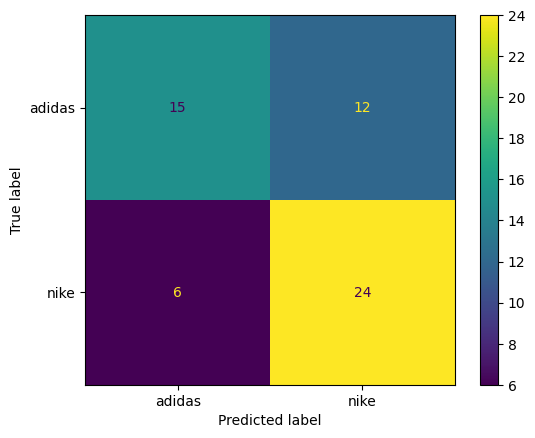

In [ ]:
# Show confusion matrix

print('Confusion Matrix')
confmat = confusion_matrix(y_true, y_pred_seq)
disp = ConfusionMatrixDisplay(confusion_matrix=confmat, display_labels=['adidas', 'nike'])
disp.plot()
plt.show()

- True Positives (TP): There are 15 samples correctly predicted as class 0 (adidas).
- False Positives (FP): There are 12 samples incorrectly predicted as class 1 (nike) but are actually class 0 (adidas).
- False Negatives (FN): There are 6 samples incorrectly predicted as class 0 (adidas) but are actually class 1 (nike).
- True Negatives (TN): There are 24 samples correctly predicted as class 1 (nike).

Based on the classification report and the confusion matrix, we can conclude that the model has reasonably good performance with an accuracy of 68%. However, there is need for improvement, particularly in terms of reducing false positives and false negatives. Further analysis and fine-tuning of the model, such as adjusting the classification threshold or exploring different techniques, may be necessary to improve our model's performance and achieve better precision and recall values for both classes.

## Prediction vs Real Data

To compare the predictions with the original data, we can create a dataframe that includes both the predicted labels and the corresponding true labels from the original test data. This will allow us to evaluate the model's performance and analyze the agreement between the predictions and the actual data.

In [ ]:
# Create a new DataFrame from the necessary columns
df_test1 = pd.DataFrame({
    'Image': test_df['images'],
    'True Label': test_df['label']
})

# Assign the predicted labels to the 'Predicted Label' column
df_test1['Predicted Label'] = y_pred_seq

# Replace the values 0 with 'adidas' and 1 with 'nike' in the 'Predicted Label' column
df_test1['Predicted Label'] = df_test1['Predicted Label'].replace({0: 'adidas', 1: 'nike'})

# Display the DataFrame
df_test1

Image True Label  \
0   /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
1   /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
2   /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
3   /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
4   /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
5   /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
6   /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
7   /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
8   /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
9   /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
10  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
11  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
12  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
13  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
14  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
15  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
16  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
17  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
18  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
19  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
20  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
21  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
22  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
23  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
24  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
25  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
26  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
27  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
28  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
29  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
30  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
31  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
32  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
33  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
34  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
35  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
36  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
37  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
38  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
39  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
40  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
41  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
42  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
43  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
44  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
45  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
46  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
47  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
48  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
49  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
50  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
51  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
52  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
53  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
54  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
55  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
56  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   

   Predicted Label  
0           adidas  
1           adidas  
2             nike  
3             nike 

# 7. Model Improvement

## Model Definition

In [ ]:
# Clear Sesion

tf.keras.backend.clear_session()
np.random.seed(Seed)
tf.random.set_seed(Seed)

# Dimension of image from EDA size image
width = 224
height = 224
channels = 3

In [ ]:
# Early Stopping

callbacks2 = [
    EarlyStopping(monitor='val_loss', patience= 5),
    ModelCheckpoint('model_best2.hdf5', monitor='val_loss', save_best_only=True)
]

We use transfer learning to allows our model to leverage the knowledge and features learned by the pre-trained model on a large dataset. The pre-trained model in transfer learning has already learned useful features and patterns from a large dataset, which can be generalized to the new task and result in better performance. Transfer learning enables us to start with a pre-trained model, which significantly reduces the training time as we only need to fine-tune the model on the target dataset. for our modeling we used EfficientNetV2S by tan

In [ ]:
# Transfer Learning

pretrained_model = EfficientNetV2S(include_top = False, weights = 'imagenet', input_shape=(width, height, channels))
pretrained_model.trainable = False

EfficientNetV2S has been widely used for image analysis and classification tasks based on research studies. One notable source is the paper titled "EfficientNetV2: Smaller Models and Faster Training" by Tan, published in the proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition (CVPR) 2021.

The research paper introduces the EfficientNetV2 architecture, which builds upon the success of the original EfficientNet models. It presents a comprehensive analysis of various scaling dimensions, including depth, width, and resolution, and proposes a compound scaling method to optimize model performance. The authors demonstrate that EfficientNetV2 models outperform previous state-of-the-art architectures, such as ResNet and EfficientNet, across multiple image classification benchmarks, including ImageNet.

EfficientNetV2S, specifically mentioned in the code snippet, is one of the variants introduced in the paper. It offers a balance between model size and performance, making it a suitable choice for image analysis tasks. The paper provides in-depth insights into the architectural design choices and the experimental results, showcasing the effectiveness and efficiency of EfficientNetV2S for image classification.

Therefore, the adoption of EfficientNetV2S for image analysis, including the classification of class 0 and class 1 images, is supported by the research findings presented in the paper "EfficientNetV2: Smaller Models and Faster Training" by Tan et al. (CVPR 2021).

In [ ]:
# Create the model
model_imp = Sequential()

model_imp.add(pretrained_model)  # Add the pretrained model as a layer
model_imp.add(Flatten())  # Flatten the output of the pretrained model

model_imp.add(Dense(64, activation='relu'))  # Add a dense layer with 64 units and ReLU activation

model_imp.add(Dense(32, activation='relu'))  # Add another dense layer with 32 units and ReLU activation

model_imp.add(Dense(1, activation='sigmoid'))  # Add the output layer with sigmoid activation

# Compile
model_imp.compile(optimizer= Adam(learning_rate=0.0003), loss='binary_crossentropy', metrics=['accuracy'])

model_imp.summary()  # Print the summary of the model architecture

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-s (Functiona  (None, 7, 7, 1280)       20331360  
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 64)                4014144   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 24,347,617
Trainable params: 4,016,257
Non-trainable params: 20,331,360
____________________________________

The model architecture consists of several layers:

- We add the pretrained_model as the first layer in model_imp. This layer utilizes the weights and architecture of a pretrained model, which is specified earlier in the code.
- The output of the pretrained model is flattened using the Flatten() layer to convert it into a 1-dimensional array.
Next, we add a dense layer with 64 units and ReLU activation. These layers help introduce non-linearity, normalize the activations, and reduce overfitting.
- We add another dense layer with 32 units and ReLU activation
- We use adam for optimazer and set learning rate 0.0003 for efficiency in handling sparse gradients, robustness to hyperparameter choices, and momentum optimization, leading to faster and more effective training our model

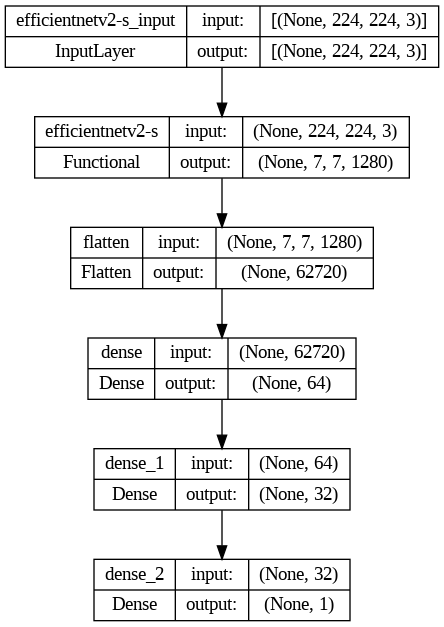

In [ ]:
# Plot Layer

tf.keras.utils.plot_model(model_imp, show_shapes=True)

## Model Training

In [ ]:
%%time
history2 = model_imp.fit(ds_train, batch_size= batch_size, 
                           epochs= 80, validation_data= ds_val,
                           callbacks= callbacks2)   

Epoch 1/80
7/7 [==============================] - 25s 2s/step - loss: 1.6530 - accuracy: 0.5355 - val_loss: 1.2415 - val_accuracy: 0.4906
Epoch 2/80
7/7 [==============================] - 9s 1s/step - loss: 1.0092 - accuracy: 0.5024 - val_loss: 0.7792 - val_accuracy: 0.5283
Epoch 3/80
7/7 [==============================] - 9s 1s/step - loss: 0.7177 - accuracy: 0.5687 - val_loss: 0.6921 - val_accuracy: 0.5660
Epoch 4/80
7/7 [==============================] - 8s 1s/step - loss: 0.6656 - accuracy: 0.6209 - val_loss: 0.6344 - val_accuracy: 0.7170
Epoch 5/80
7/7 [==============================] - 8s 1s/step - loss: 0.6628 - accuracy: 0.6066 - val_loss: 0.6413 - val_accuracy: 0.6226
Epoch 6/80
7/7 [==============================] - 7s 1s/step - loss: 0.6592 - accuracy: 0.6090 - val_loss: 0.6377 - val_accuracy: 0.6604
Epoch 7/80
7/7 [==============================] - 9s 979ms/step - loss: 0.6135 - accuracy: 0.6659 - val_loss: 0.6384 - val_accuracy: 0.6226
Epoch 8/80
7/7 [=====================

## Model Evaluation

In [ ]:
# Make result of training model to data frame

history_imp_df = pd.DataFrame(history2.history)

<Axes: >

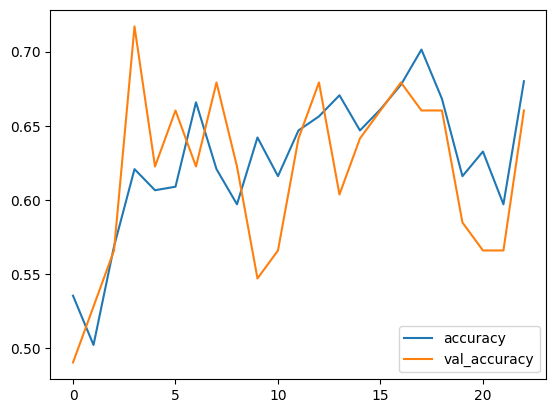

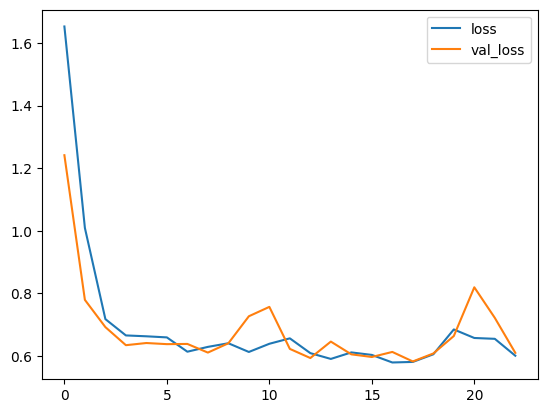

In [ ]:
# Show in Plot grafik about the result

history_imp_df[['accuracy', 'val_accuracy']].plot()
history_imp_df[['loss', 'val_loss']].plot()

1. The loss and validation loss intersect at epoch 6 indicates that the model is learning and making progress in minimizing the loss on both the training and validation data. This suggests that the model is converging and improving its performance.

2. The fluctuating behavior of the validation loss after epoch 6 suggests that the model may encounter certain challenges or variations in the validation data that affect its performance. The frequent intersections with the loss indicate that the model is still able to adapt and achieve similar performance on both the training and validation data.

3. The significant spike in the validation loss at epoch 18 suggests that the model may have encountered a particularly challenging subset of the validation data or faced difficulties in generalizing to that specific portion. However, the subsequent decrease in the validation loss indicates that the model is able to recover and improve its performance again

In [ ]:
# Get real lebel from data train
y_true2 = df_test.labels

# Save prediction model for each batch
y_pred_seq2 = []
for _ in range(len(df_test)):
    batch_data, batch_labels = next(df_test)
    batch_predictions = model_imp.predict(batch_data)
    batch_predictions = np.where(batch_predictions >= 0.5, 1, 0)
    y_pred_seq2.extend(batch_predictions)

# Change into array
y_true2 = y_true2[:len(y_pred_seq2)]
y_true2 = np.array(y_true2)
y_pred_seq2 = np.array(y_pred_seq2)

# Show classification report
print("Classification Report:")
print(classification_report(y_true2, y_pred_seq2))

2/2 [==============================] - 0s 163ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.63      0.64        27
           1       0.68      0.70      0.69        30

    accuracy                           0.67        57
   macro avg       0.67      0.66      0.67        57
weighted avg       0.67      0.67      0.67        57



1. The precision for class 0 (adidas) is 0.65, which means that out of all the predicted samples labeled as class 0, 65% were actually true positives. For class 1 (nike), the precision is 0.68, indicating that 68% of the predicted samples labeled as class 1 were actually true positives. Higher precision values indicate a lower rate of false positives.

2. The recall for class 0 is 0.63, meaning that the model correctly identified 63% of the actual samples belonging to class 0. For class 1, the recall is 0.70, indicating that 70% of the actual samples belonging to class 1 were correctly identified by the model. Higher recall values indicate a lower rate of false negatives.

3. The F1-score combines precision and recall into a single metric, providing a balance between the two. The F1-score for class 0 is 0.64, and for class 1, it is 0.69. The weighted average F1-score is 0.67, which takes into account the class distribution. A higher F1-score indicates a better balance between precision and recall.

5. Accuracy of the model on the test dataset is 0.67, meaning that it correctly predicted the class labels for 67% of the samples. Accuracy represents the proportion of correctly classified samples out of the total number of samples.

In summary, the model achieved reasonably balanced performance with similar precision, recall, and F1-score for both classes

Confusion Matrix


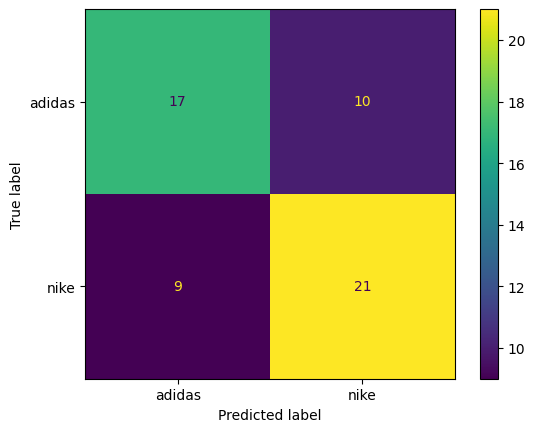

In [ ]:
# Show confusion matrix

print('Confusion Matrix')
confmat = confusion_matrix(y_true2, y_pred_seq2)
disp = ConfusionMatrixDisplay(confusion_matrix=confmat, display_labels=['adidas', 'nike'])
disp.plot()
plt.show()

- True positive (TP): The model correctly predicted 17 samples as class 0 (adidas).
- False negative (FN): The model incorrectly predicted 9 samples as class 0 (adidas) when they actually belonged to class 1 (nike).
- False positive (FP): The model incorrectly predicted 10 samples as class 1 (nike) when they actually belonged to class 0 (adidas).
- True negative (TN): The model correctly predicted 21 samples as class 1 (nike).

# 8. EDA Improvement

To gain a clearer understanding of the interpretation of the confusion matrix, further exploratory data analysis (EDA) was conducted between the predicted results and the original data, aligning them with the predicted outcomes according to the confusion matrix.

The EDA involved examining the images and their corresponding labels to compare them with the predicted labels. By visually inspecting the images, it was possible to assess whether the model's predictions aligned with the actual content of the images and their true labels.

By conducting this analysis, it becomes possible to investigate potential reasons behind the false negative and false positive predictions. This additional step helps to provide more context and insights into the model's performance, allowing for a deeper understanding of its strengths and weaknesses.

## Create Dataframe Prediction

In [ ]:
# Create a new DataFrame from the necessary columns
df_test2 = pd.DataFrame({
    'Image': test_df['images'],  # 'images' column contains the path to the image files
    'True Label': test_df['label']  # 'label' column contains the true labels
})

# Convert y_pred_seq2 array to a DataFrame and assign it to the 'Predicted Label' column
df_test2['Predicted Label'] = pd.DataFrame(y_pred_seq2)

# Replace the values 0 with 'adidas' and 1 with 'nike' in the 'Predicted Label' column
df_test2['Predicted Label'] = df_test2['Predicted Label'].replace({0: 'adidas', 1: 'nike'})

# Add a new column 'Result Predict' based on the condition of 'Predicted Label' matching 'True Label'
df_test2['Result Predict'] = df_test2['Predicted Label'] == df_test2['True Label']
df_test2['Result Predict'] = df_test2['Result Predict'].replace({True: 'True', False: 'False'})

# Reset the index
df_test2 = df_test2.reset_index(drop=True)

# Display the DataFrame
df_test2

Image True Label  \
0   /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
1   /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
2   /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
3   /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
4   /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
5   /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
6   /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
7   /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
8   /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
9   /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
10  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
11  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
12  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
13  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
14  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
15  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
16  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
17  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
18  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
19  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
20  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
21  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
22  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
23  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
24  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
25  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
26  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
27  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
28  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
29  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
30  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
31  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
32  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
33  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
34  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
35  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
36  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
37  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
38  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
39  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
40  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
41  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
42  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
43  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
44  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
45  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
46  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
47  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
48  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
49  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
50  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
51  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
52  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
53  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
54  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
55  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
56  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   

   Predicted Label Result Predict  
0           adidas          False  
1           adidas           Tr

## Correct Adidas Prediction

In [ ]:
# Use query to make dataframe
correct_adidas= df_test2.query("`True Label` == 'adidas' and `Predicted Label` == 'adidas' and `Result Predict` == 'True'")

# Show DataFrame baru
correct_adidas.to_string(index=False)
correct_adidas

Image True Label  \
1   /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
11  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
12  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
23  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
25  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
26  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
32  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
33  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
34  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
39  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
43  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
44  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
50  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
51  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
52  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
53  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
54  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   

   Predicted Label Result Predict  
1           adidas           True  
11          adidas           True  
12          adidas           True  
23          adidas           True  
25          adidas           True  
26          adidas           True  
32          adidas           True  
33          adidas           True  
34          adidas           True  
39          adidas           True  
43          adidas           True  
44          adidas           True  
50          adidas           True  
51          adidas           True  
52          adidas           True  
53          adidas           True  
54          adidas           True

## Incorrect Adidas Prediction

In [ ]:
# Use query for make dataframe 
incorrect_adidas= df_test2.query("`True Label` == 'adidas' and `Predicted Label` == 'nike' and `Result Predict` == 'False'")

# Show Dataframe
incorrect_adidas.to_string(index=False)
incorrect_adidas

Image True Label  \
7   /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
8   /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
15  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
29  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
41  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
42  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
46  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
47  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
48  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   
49  /content/drive/MyDrive/Shoes_dataset/Brand/tes...     adidas   

   Predicted Label Result Predict  
7             nike          False  
8             nike          False  
15            nike          False  
29            nike          False  
41            nike          False  
42            nike          False  
46            nike          False  
47            nike          False  
48            nike          False  
49            nike          False

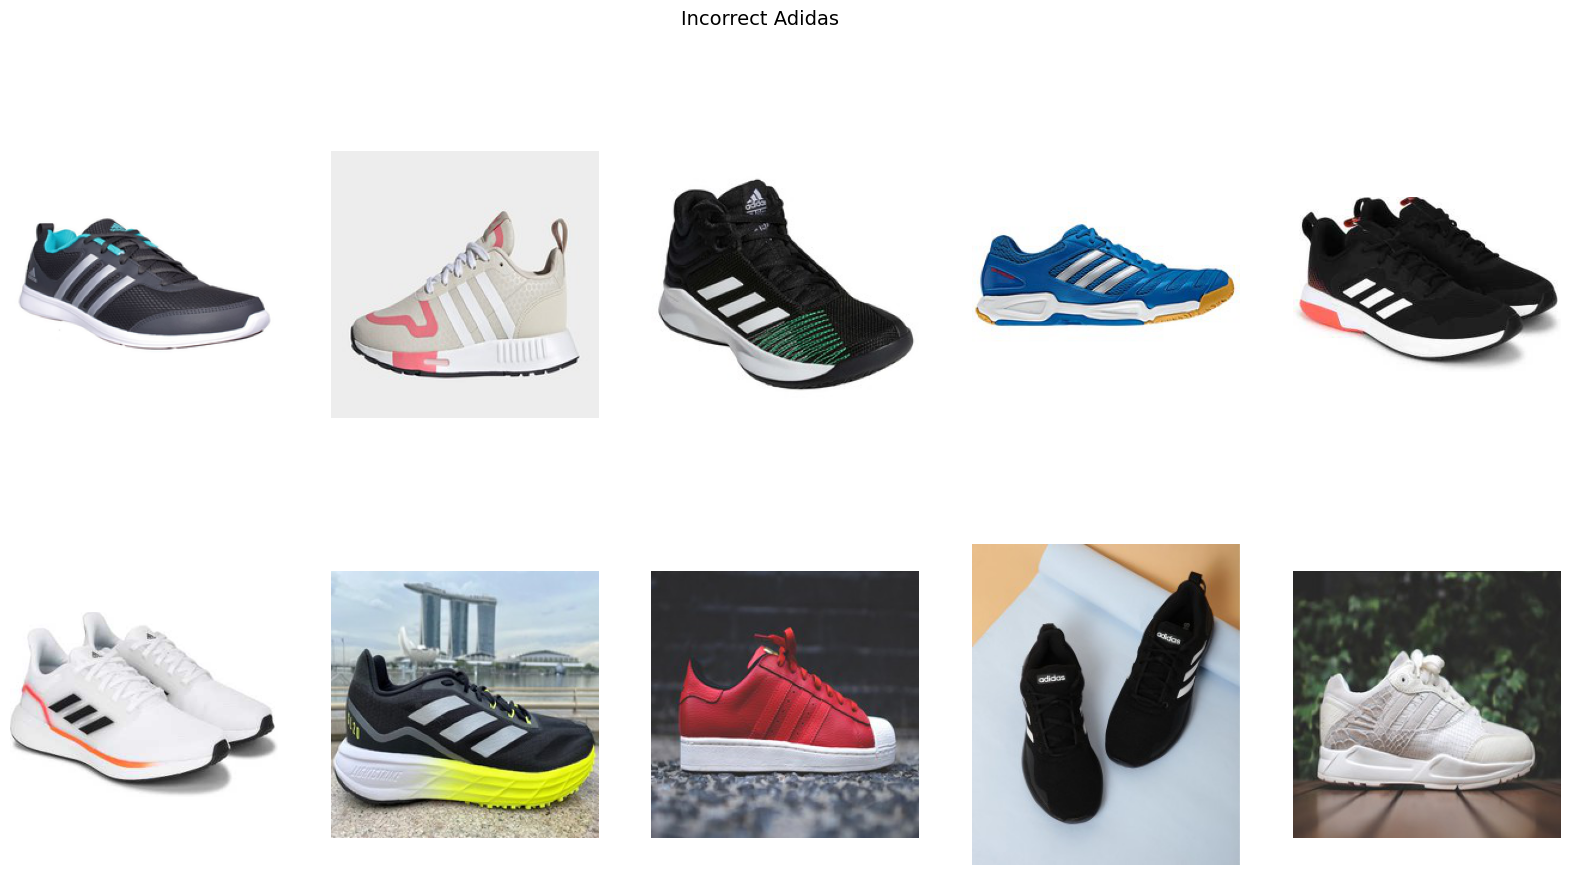

In [ ]:
# Get file name from image colom
image_files = incorrect_adidas['Image']

# Show Image
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20,10))
fig.suptitle("Incorrect Adidas", fontsize=14)

for i, image_file in enumerate(image_files):
    img = mpimg.imread(image_file)
    ax[i // 5, i % 5].imshow(img)
    ax[i // 5, i % 5].axis('off')

plt.show()

Based on the query results and the assumption that the false predictions are for incorrect adidas labels, the following insights can be derived:

1. Some shoes in the dataset may have backgrounds that are more prominent or visually distracting compared to the shoe itself. This could lead to confusion for the model during the modeling process, as it might focus more on the background instead of the actual shoe features. Preprocessing techniques such as background removal or image augmentation could potentially help address this issue.

2. The model seems to struggle with accurately predicting black-colored adidas shoes. It is possible that the training data may not have contained a sufficient variety of black adidas shoes or that the model needs more fine-tuning to effectively capture the distinguishing features of black-colored shoes. Further analysis and adjustments to the training data or model architecture may be necessary to improve the model's performance on black adidas shoes.

3. The model's inability to correctly predict paired shoes suggests a limitation in its understanding of the relationship between shoe pairs. It might be challenging for the model to differentiate between left and right shoes or to recognize the similarities between them. Enhancements to the dataset, such as including more paired shoe images or considering techniques like siamese networks, could potentially help address this issue.

These insights highlight specific areas where the model can be further optimized and provide valuable guidance for future improvements to enhance the model's performance in predicting adidas shoes accurately.

## Correct Nike Prediction

In [ ]:
# Membuat DataFrame baru berdasarkan query
correct_nike= df_test2.query("`True Label` == 'nike' and `Predicted Label` == 'nike' and `Result Predict` == 'True'")

# Menampilkan DataFrame baru
correct_nike.to_string(index=False)
correct_nike

Image True Label  \
2   /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
4   /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
5   /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
6   /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
9   /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
10  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
14  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
17  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
18  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
19  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
21  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
22  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
24  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
27  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
28  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
30  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
31  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
36  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
38  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
40  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
55  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   

   Predicted Label Result Predict  
2             nike           True  
4             nike           True  
5             nike           True  
6             nike           True  
9             nike           True  
10            nike           True  
14            nike           True  
17            nike           True  
18            nike           True  
19            nike           True  
21            nike           True  
22            nike           True  
24            nike           True  
27            nike           True  
28            nike           True  
30            nike           True  
31            nike           True  
36            nike           True  
38            nike           True  
40            nike           True  
55            nike           True

## Incorrect Nike Prediction

In [ ]:
# Use Query to make dataframe
incorrect_nike= df_test2.query("`True Label` == 'nike' and `Predicted Label` == 'adidas' and `Result Predict` == 'False'")

# Show dataframe
incorrect_nike.to_string(index=False)
incorrect_nike

Image True Label  \
0   /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
3   /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
13  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
16  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
20  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
35  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
37  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
45  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   
56  /content/drive/MyDrive/Shoes_dataset/Brand/tes...       nike   

   Predicted Label Result Predict  
0           adidas          False  
3           adidas          False  
13          adidas          False  
16          adidas          False  
20          adidas          False  
35          adidas          False  
37          adidas          False  
45          adidas          False  
56          adidas          False

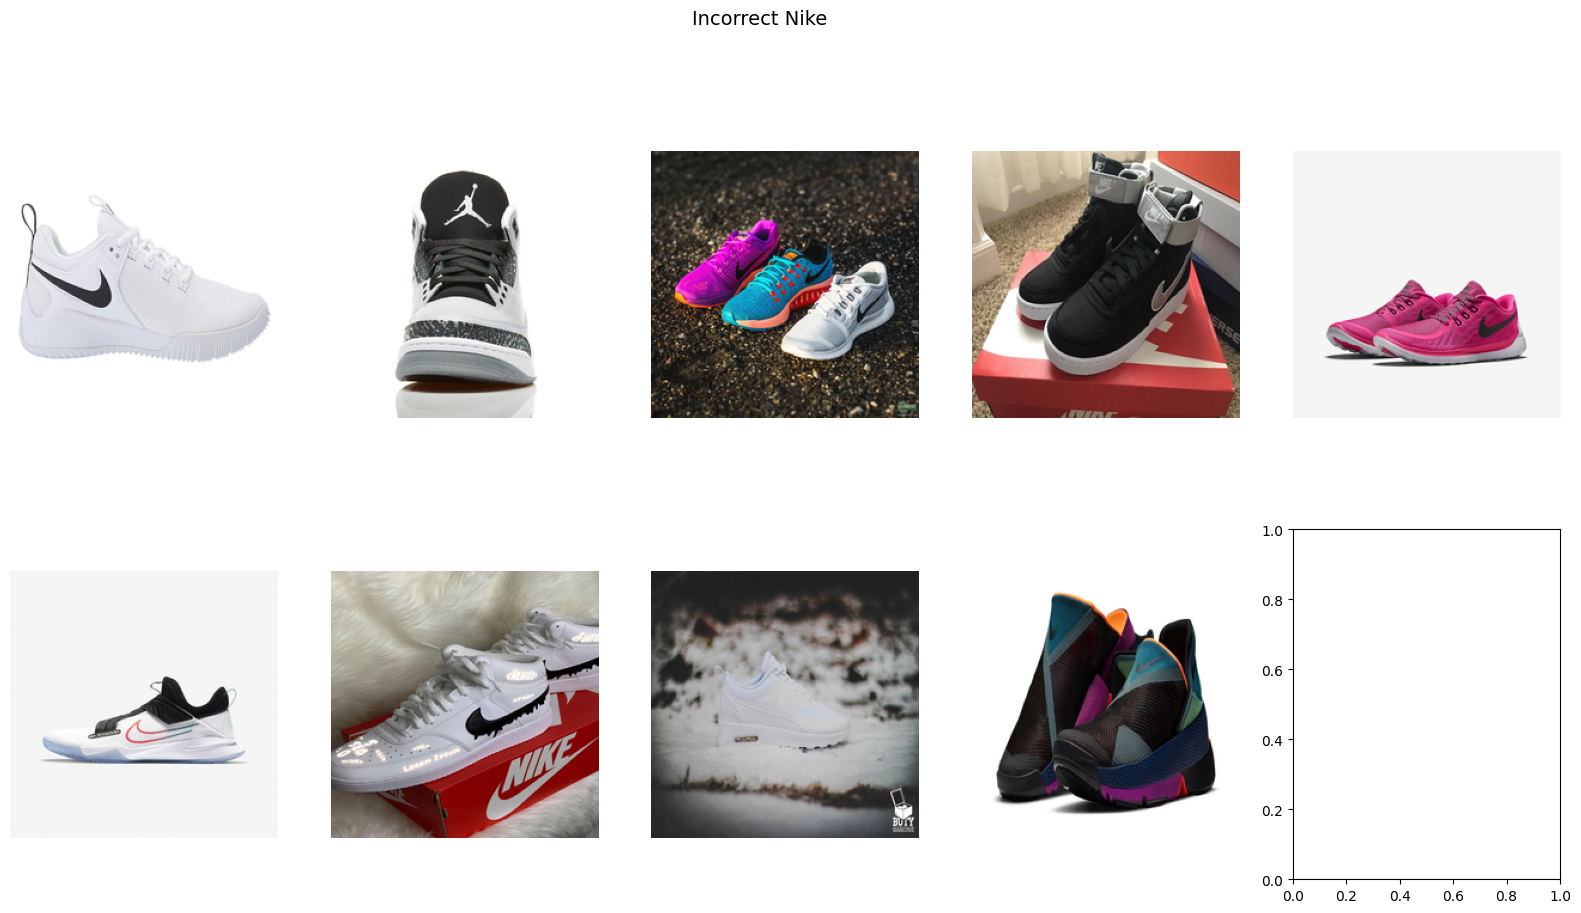

In [ ]:
# Get file name image from image columns
image_files1 = incorrect_nike['Image']

# Show image
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20,10))
fig.suptitle("Incorrect Nike", fontsize=14)

for i, image_file in enumerate(image_files1):
    img = mpimg.imread(image_file)
    ax[i // 5, i % 5].imshow(img)
    ax[i // 5, i % 5].axis('off')

plt.show()

Based on the query results and the assumption that the false predictions are for incorrect nike labels, the following insights can be derived:

1. Some shoes in the dataset may have backgrounds that are more prominent or visually distracting compared to the shoe itself. This could lead to confusion for the model during the modeling process, as it might focus more on the background instead of the actual shoe features. Preprocessing techniques such as background removal or image augmentation could potentially help address this issue.

2. The model seems to struggle with accurately predicting white-colored nike shoes. It is possible that the training data may not have contained a sufficient variety of white nike shoes or that the model needs more fine-tuning to effectively capture the distinguishing features of white-colored shoes. Further analysis and adjustments to the training data or model architecture may be necessary to improve the model's performance on white nike shoes.

3. The model's inability to correctly predict paired shoes suggests a limitation in its understanding of the relationship between shoe pairs. It might be challenging for the model to differentiate between left and right shoes or to recognize the similarities between them. Enhancements to the dataset, such as including more paired shoe images or considering techniques like siamese networks, could potentially help address this issue.

4. The model struggles with accurately predicting shoes that are facing forward. This could be due to variations in the training data, where the majority of shoes are depicted from a different angle. To improve the model's ability to recognize forward-facing shoes, it may be beneficial to augment the dataset with more images of shoes facing forward or to apply data augmentation techniques that simulate different viewing angles.

5. There is a new model of Nike shoes that does not have the distinctive Nike logo on the shoes, so the model is unable to recognize them because this type of shoe is relatively new and not included in the training data.

These insights highlight specific areas where the model can be further optimized and provide valuable guidance for future improvements to enhance the model's performance in predicting nike shoes accurately.

# 9. Model Inference

Saving nike-air-jordan-dok-nike-2_169.jpg to nike-air-jordan-dok-nike-2_169 (3).jpg
Saving 32672d6a-f35e-4aa5-8d54-93433461072f.jpg to 32672d6a-f35e-4aa5-8d54-93433461072f (3).jpg
Saving download-1.jpg to download-1 (4).jpg
Saving download.jpg to download (5).jpg
Saving images-1.jpg to images-1 (5).jpg
Saving images-2.jpg to images-2 (5).jpg
Saving images-3.jpg to images-3 (5).jpg
Saving images-4.jpg to images-4 (6).jpg
Saving images.jpg to images (6).jpg


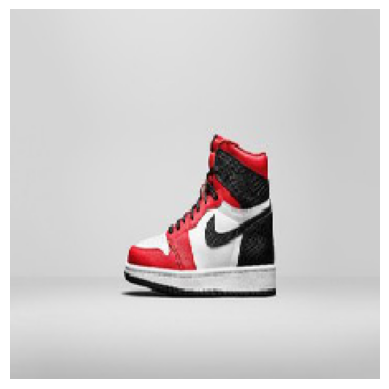

1/1 [==============================] - 0s 39ms/step
[[0.7170508]]
nike


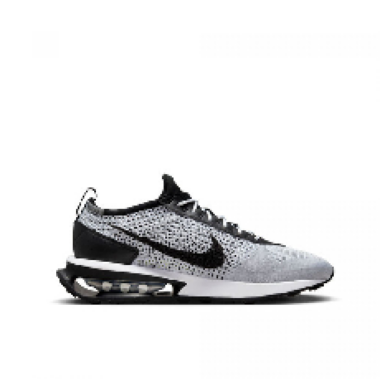

1/1 [==============================] - 0s 38ms/step
[[0.5364477]]
nike


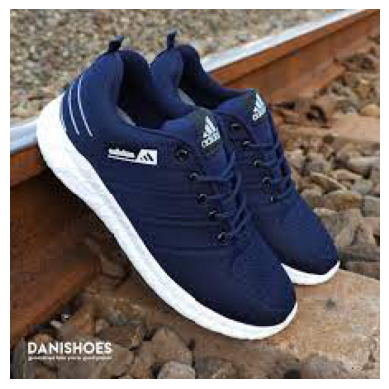

1/1 [==============================] - 0s 35ms/step
[[0.5217397]]
nike


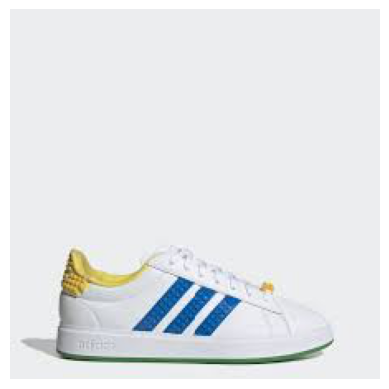

1/1 [==============================] - 0s 40ms/step
[[0.36636704]]
adidas


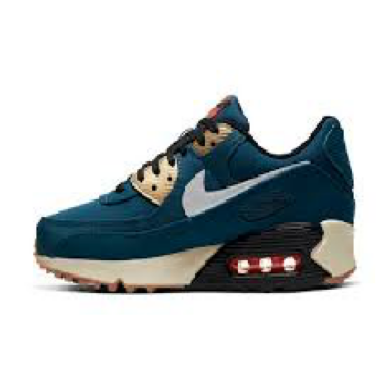

1/1 [==============================] - 0s 32ms/step
[[0.38174832]]
adidas


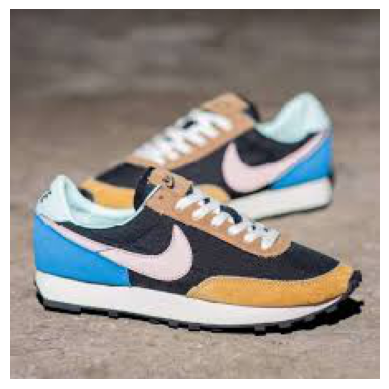

1/1 [==============================] - 0s 44ms/step
[[0.55979437]]
nike


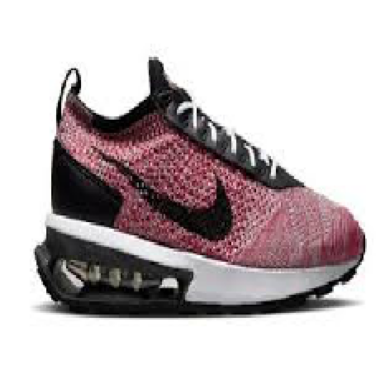

1/1 [==============================] - 0s 32ms/step
[[0.64936376]]
nike


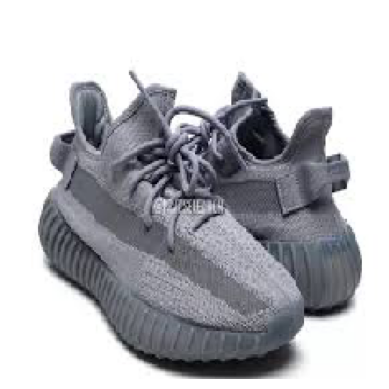

1/1 [==============================] - 0s 32ms/step
[[0.7650376]]
nike


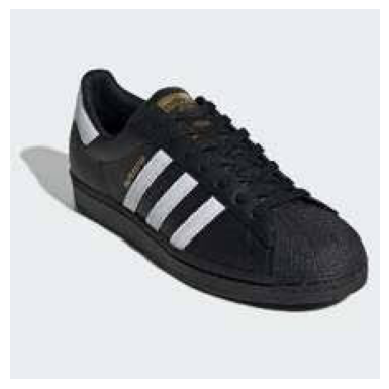

1/1 [==============================] - 0s 30ms/step
[[0.8961336]]
nike


In [ ]:
uploaded_files = files.upload()

for fn in uploaded_files.keys():
    # Prediction with upload image
    path = fn
    img = tf.keras.utils.load_img(path, target_size=(img_height, img_width, channels)) 
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    x = tf.keras.utils.img_to_array(img)  # change image to array
    x = np.expand_dims(x, axis=0)  # Expand dimension of array 1D to 2D

    images = np.vstack([x])
    classes = model_imp.predict(images)
    print(classes)
    result_pred = tf.where(classes >= 0.5, 1, 0)
    if result_pred == 0:
        print('adidas')
    else:
        print('nike')

# 10. Model Saving

In [ ]:
model_imp.trainable = False
model_imp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-s (Functiona  (None, 7, 7, 1280)       20331360  
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 64)                4014144   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 24,347,617
Trainable params: 0
Non-trainable params: 24,347,617
____________________________________________

In [ ]:
# Save CNN Model

model_imp.save('shoes_model.h5')

# Conclusion

## EDA Before modelling

1. The dataset of Adidas and Nike image shoes have balanced distribution with same size (224 x 224) for each image.

2. RGB is the best spectrum colour provides the most accurate representation of the image's clarity or visual quality of image shoes


## Modelling

1. This modelling can only process image of shoes adidas and nike brand. if use another brand the model will false prediction

2. Training performance modelling have achieved reasonably balanced performance with similar precision, recall, and F1-score for both classes.

3. Testing performance modelling have intersecting validation loss and loss at epoch 6 indicate that the model is learning and improving its performance. The fluctuating behavior of the validation loss suggests that the model can adapt to variations in the data. However, the significant spike in validation loss at epoch 18 highlights challenges in generalization. Despite this, the subsequent decrease in validation loss indicates the model's ability to recover and improve.

4. This modelling have bad performance when get type image following this:
- double shoes image
- an image that has a pattern on the background
- Front view of angel
- Black and white shoes image
- new model of shoes